2) Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations using
Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
# Custome DataSet
data = {
    "Student_ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Name": ["Alice", "Bob", "Charlie", "David", "Eva", "Frank", "Grace", "Hannah", "Ian", "Jack"],
    "Math_Score": [85, 92, np.nan, 78, 95, 45, 88, 76, 99, 102],
    "Science_Score": [80, 85, 88, 92, 95, 50, 78, 82, 91, 105],
    "English_Score": [78, 81, 85, 87, 90, 55, 79, 84, 88, np.nan],
    "Attendance": [90, 85, 88, np.nan, 95, 60, 80, 85, 99, 100],
    "Participation": [3, 5, 4, 2, 5, 1, 3, 4, 5, 2],
}

In [156]:
oAcademicDf = pd.DataFrame(data)

In [157]:
oAcademicDf

,Student_ID,Name,Math_Score,Science_Score,English_Score,Attendance,Participation
0,1,Alice,85.0,80,78.0,90.0,3
1,2,Bob,92.0,85,81.0,85.0,5
2,3,Charlie,NaN,88,85.0,88.0,4
3,4,David,78.0,92,87.0,NaN,2
4,5,Eva,95.0,95,90.0,95.0,5
5,6,Frank,45.0,50,55.0,60.0,1
6,7,Grace,88.0,78,79.0,80.0,3
7,8,Hannah,76.0,82,84.0,85.0,4
8,9,Ian,99.0,91,88.0,99.0,5
9,10,Jack,102.0,105,NaN,100.0,2


In [158]:
oAcademicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Student_ID     10 non-null     int64  
 1   Name           10 non-null     object 
 2   Math_Score     9 non-null      float64
 3   Science_Score  10 non-null     int64  
 4   English_Score  9 non-null      float64
 5   Attendance     9 non-null      float64
 6   Participation  10 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 692.0+ bytes


In [159]:
# checking null value
oAcademicDf.isnull().sum()

,0
Student_ID,0
Name,0
Math_Score,1
Science_Score,0
English_Score,1
Attendance,1
Participation,0


In [160]:
oAcademicDf['Math_Score'].mean()

np.float64(84.44444444444444)

In [161]:
oAcademicDf['Math_Score'].median()

88.0

In [162]:
oAcademicDf

,Student_ID,Name,Math_Score,Science_Score,English_Score,Attendance,Participation
0,1,Alice,85.0,80,78.0,90.0,3
1,2,Bob,92.0,85,81.0,85.0,5
2,3,Charlie,NaN,88,85.0,88.0,4
3,4,David,78.0,92,87.0,NaN,2
4,5,Eva,95.0,95,90.0,95.0,5
5,6,Frank,45.0,50,55.0,60.0,1
6,7,Grace,88.0,78,79.0,80.0,3
7,8,Hannah,76.0,82,84.0,85.0,4
8,9,Ian,99.0,91,88.0,99.0,5
9,10,Jack,102.0,105,NaN,100.0,2


In [163]:
# Filling null value with meadian
oAcademicDf['Math_Score'] = oAcademicDf['Math_Score'].fillna(oAcademicDf['Math_Score'].median()) # Selecting median beacuse there is outlier
oAcademicDf['English_Score'] = oAcademicDf['English_Score'].fillna(oAcademicDf['English_Score'].median())
oAcademicDf['Attendance'] = oAcademicDf['Attendance'].fillna(oAcademicDf['Attendance'].median())

In [164]:
oAcademicDf

,Student_ID,Name,Math_Score,Science_Score,English_Score,Attendance,Participation
0,1,Alice,85.0,80,78.0,90.0,3
1,2,Bob,92.0,85,81.0,85.0,5
2,3,Charlie,88.0,88,85.0,88.0,4
3,4,David,78.0,92,87.0,88.0,2
4,5,Eva,95.0,95,90.0,95.0,5
5,6,Frank,45.0,50,55.0,60.0,1
6,7,Grace,88.0,78,79.0,80.0,3
7,8,Hannah,76.0,82,84.0,85.0,4
8,9,Ian,99.0,91,88.0,99.0,5
9,10,Jack,102.0,105,84.0,100.0,2


In [165]:
oAcademicDf.isnull().sum()

,0
Student_ID,0
Name,0
Math_Score,0
Science_Score,0
English_Score,0
Attendance,0
Participation,0


# Outlier Detection and removal

In [166]:
oAcademicDf.describe()

,Student_ID,Math_Score,Science_Score,English_Score,Attendance,Participation
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,5.50000,84.800000,84.600000,81.100000,87.000000,3.400000
std,3.02765,16.267213,14.531193,9.938142,11.421228,1.429841
min,1.00000,45.000000,50.000000,55.000000,60.000000,1.000000
25%,3.25000,79.750000,80.500000,79.500000,85.000000,2.250000
50%,5.50000,88.000000,86.500000,84.000000,88.000000,3.500000
75%,7.75000,94.250000,91.750000,86.500000,93.750000,4.750000
max,10.00000,102.000000,105.000000,90.000000,100.000000,5.000000


<ipython-input-167-6b06cc8776ee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(oAcademicDf['Math_Score'])


<Axes: xlabel='Math_Score', ylabel='Density'>

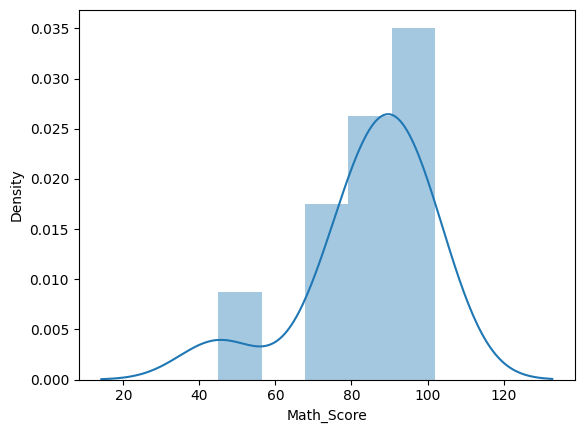

In [167]:
sns.distplot(oAcademicDf['Math_Score'])

### From the above deaigram we see data have some outliers
#### To see outlier we use boxplot

<Axes: xlabel='Math_Score'>

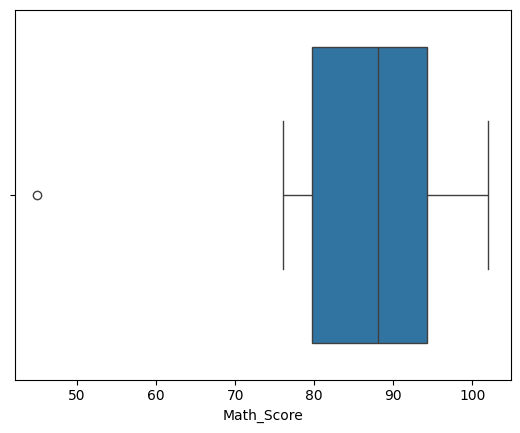

In [168]:
sns.boxplot(x=oAcademicDf['Math_Score'])

In [169]:
# Z-Score Method
#  Used to find the Limit
fUpperLimitMathScore = oAcademicDf['Math_Score'].mean() +3 * oAcademicDf['Math_Score'].std()
fLowerLimitMathScore = oAcademicDf['Math_Score'].mean() -3 * oAcademicDf['Math_Score'].std()


In [170]:
print("Upper Limit MathScore:- ",fUpperLimitMathScore)
print("Lower Limit MathScore:- ",fLowerLimitMathScore)

Upper Limit MathScore:-  133.60163931672787
Lower Limit MathScore:-  35.998360683272125


In [171]:
# # Checking the Outliers
Q1 = oAcademicDf['Math_Score'].quantile(0.25)
Q3 = oAcademicDf['Math_Score'].quantile(0.75)
IQR = Q3 - Q1
iUpperLimit = Q3 + 1.5 * IQR
iLowerLimit = Q1 - 1.5 * IQR

print("Q1:- ",Q1)
print("Q3:- ",Q3)
print("IQR:- ",IQR)
print("Upper Limit:- ",iUpperLimit)
print("Lower Limit:- ",iLowerLimit)


Q1:-  79.75
Q3:-  94.25
IQR:-  14.5
Upper Limit:-  116.0
Lower Limit:-  58.0


In [172]:
Q1 = oAcademicDf[["Math_Score", "Science_Score"]].quantile(0.25)
Q3 = oAcademicDf[["Math_Score", "Science_Score"]].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

outliers = (oAcademicDf[["Math_Score", "Science_Score"]] < lower_bound) | (oAcademicDf[["Math_Score", "Science_Score"]] > upper_bound)
print(outliers.sum())



Math_Score       58.000
Science_Score    63.625
dtype: float64
Math_Score       116.000
Science_Score    108.625
dtype: float64
Math_Score       1
Science_Score    1
dtype: int64


In [173]:
# Find the outlier
oAcademicDf[(oAcademicDf['Math_Score'] < iLowerLimit) | (oAcademicDf['Math_Score'] > iUpperLimit)]

,Student_ID,Name,Math_Score,Science_Score,English_Score,Attendance,Participation
5,6,Frank,45.0,50,55.0,60.0,1


In [174]:
oAcademicNewDf = oAcademicDf.loc[(oAcademicDf['Math_Score'] < iUpperLimit) & (oAcademicDf['Math_Score'] > iLowerLimit)]
print(len(oAcademicNewDf))
print(len(oAcademicDf))

9
10


In [175]:
Q1 = oAcademicNewDf['Science_Score'].quantile(0.25)
Q3 = oAcademicNewDf['Science_Score'].quantile(0.75)
IQR = Q3 - Q1
iUpperLimit = Q3 + 1.5 * IQR
iLowerLimit = Q1 - 1.5 * IQR
print("Q1:- ",Q1)
print("Q3:- ",Q3)
print("IQR:- ",IQR)
print("Upper Limit:- ",iUpperLimit)
print("Lower Limit:- ",iLowerLimit)

Q1:-  82.0
Q3:-  92.0
IQR:-  10.0
Upper Limit:-  107.0
Lower Limit:-  67.0


In [176]:
oAcademicNewDf[(oAcademicNewDf['Science_Score'] < iLowerLimit) | (oAcademicNewDf['Science_Score'] > iUpperLimit)]

,Student_ID,Name,Math_Score,Science_Score,English_Score,Attendance,Participation


In [177]:
oAcademicNewDf = oAcademicNewDf.loc[(oAcademicNewDf['Science_Score'] < iUpperLimit) &(oAcademicNewDf['Science_Score'] > iLowerLimit )]
print(len(oAcademicNewDf))
print(len(oAcademicDf))

9
10


In [178]:
oAcademicNewDf

,Student_ID,Name,Math_Score,Science_Score,English_Score,Attendance,Participation
0,1,Alice,85.0,80,78.0,90.0,3
1,2,Bob,92.0,85,81.0,85.0,5
2,3,Charlie,88.0,88,85.0,88.0,4
3,4,David,78.0,92,87.0,88.0,2
4,5,Eva,95.0,95,90.0,95.0,5
6,7,Grace,88.0,78,79.0,80.0,3
7,8,Hannah,76.0,82,84.0,85.0,4
8,9,Ian,99.0,91,88.0,99.0,5
9,10,Jack,102.0,105,84.0,100.0,2


<Axes: xlabel='Math_Score'>

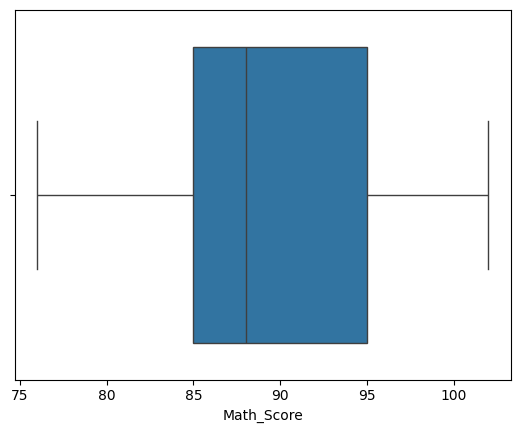

In [180]:
sns.boxplot(x=oAcademicNewDf['Math_Score'])

In [181]:
# copping  - change the outlier value to upper (or ) lower limit value
newData = oAcademicNewDf.copy()
newData.loc[newData['Science_Score']> iUpperLimit, 'Science_Score'] = iUpperLimit
newData.loc[newData['Science_Score']< iLowerLimit, 'Science_Score'] = iLowerLimit

<Axes: xlabel='Science_Score'>

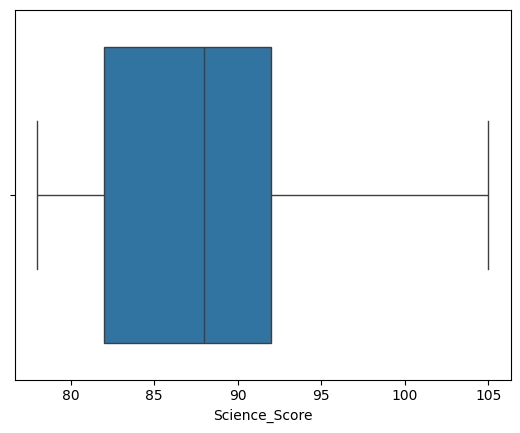

In [182]:
sns.boxplot(x=newData['Science_Score'])